In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('log_mini.csv')
df.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone


## change the datatype

In [3]:
for colname in ['skip_1','skip_2','skip_3','not_skipped','hist_user_behavior_is_shuffle','premium']:
    df[colname] = df[colname].astype(int,copy=False)

In [4]:
df.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0,0,1,0,0,...,0,0,0,1,16,2018-07-15,1,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,0,0,0,1,0,1,...,0,0,0,1,16,2018-07-15,1,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,0,0,0,1,0,1,...,0,0,0,1,16,2018-07-15,1,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,0,0,0,1,0,1,...,0,0,0,1,16,2018-07-15,1,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,0,0,0,1,0,1,...,0,0,0,1,16,2018-07-15,1,editorial_playlist,trackdone,trackdone


In [5]:
df.dtypes

session_id                         object
session_position                    int64
session_length                      int64
track_id_clean                     object
skip_1                              int32
skip_2                              int32
skip_3                              int32
not_skipped                         int32
context_switch                      int64
no_pause_before_play                int64
short_pause_before_play             int64
long_pause_before_play              int64
hist_user_behavior_n_seekfwd        int64
hist_user_behavior_n_seekback       int64
hist_user_behavior_is_shuffle       int32
hour_of_day                         int64
date                               object
premium                             int32
context_type                       object
hist_user_behavior_reason_start    object
hist_user_behavior_reason_end      object
dtype: object

##### true == 1 , false == 0

In [6]:
col = ['skip_1','skip_2','skip_3',
       'not_skipped','context_switch','no_pause_before_play',
       'short_pause_before_play','long_pause_before_play','hist_user_behavior_is_shuffle',
       'premium']

In [7]:
df.describe()

,session_position,session_length,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,premium
count,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000
mean,9.325911,17.651823,0.421503,0.517179,0.648380,0.332881,0.040904,0.767602,0.146635,0.172832,0.038909,0.046259,0.308732,14.193084,0.810418
std,5.457638,3.422025,0.493801,0.499706,0.477478,0.471246,0.198069,0.422363,0.353742,0.378103,0.367295,0.606558,0.461972,5.996243,0.391971
min,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,1.000000
50%,9.000000,20.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,1.000000
75%,14.000000,20.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,1.000000
max,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,60.000000,151.000000,1.000000,23.000000,1.000000


In [8]:
df.describe(include=['O'])

,session_id,track_id_clean,date,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
count,167880,167880,167880,167880,167880,167880
unique,10000,50704,18,6,9,7
top,0_062f416c-eabf-4bb1-b416-673da1427af6,t_bacf06d3-9185-4183-84ea-ff0db51475ce,2018-07-15,user_collection,fwdbtn,fwdbtn
freq,20,1427,119639,67430,79912,81389


## plot all categorical features

In [9]:
col = ['skip_1','skip_2','skip_3',
       'not_skipped','context_switch','no_pause_before_play',
       'short_pause_before_play','long_pause_before_play','hist_user_behavior_is_shuffle',
       'premium','context_type','hist_user_behavior_reason_start',
       'hist_user_behavior_reason_end']

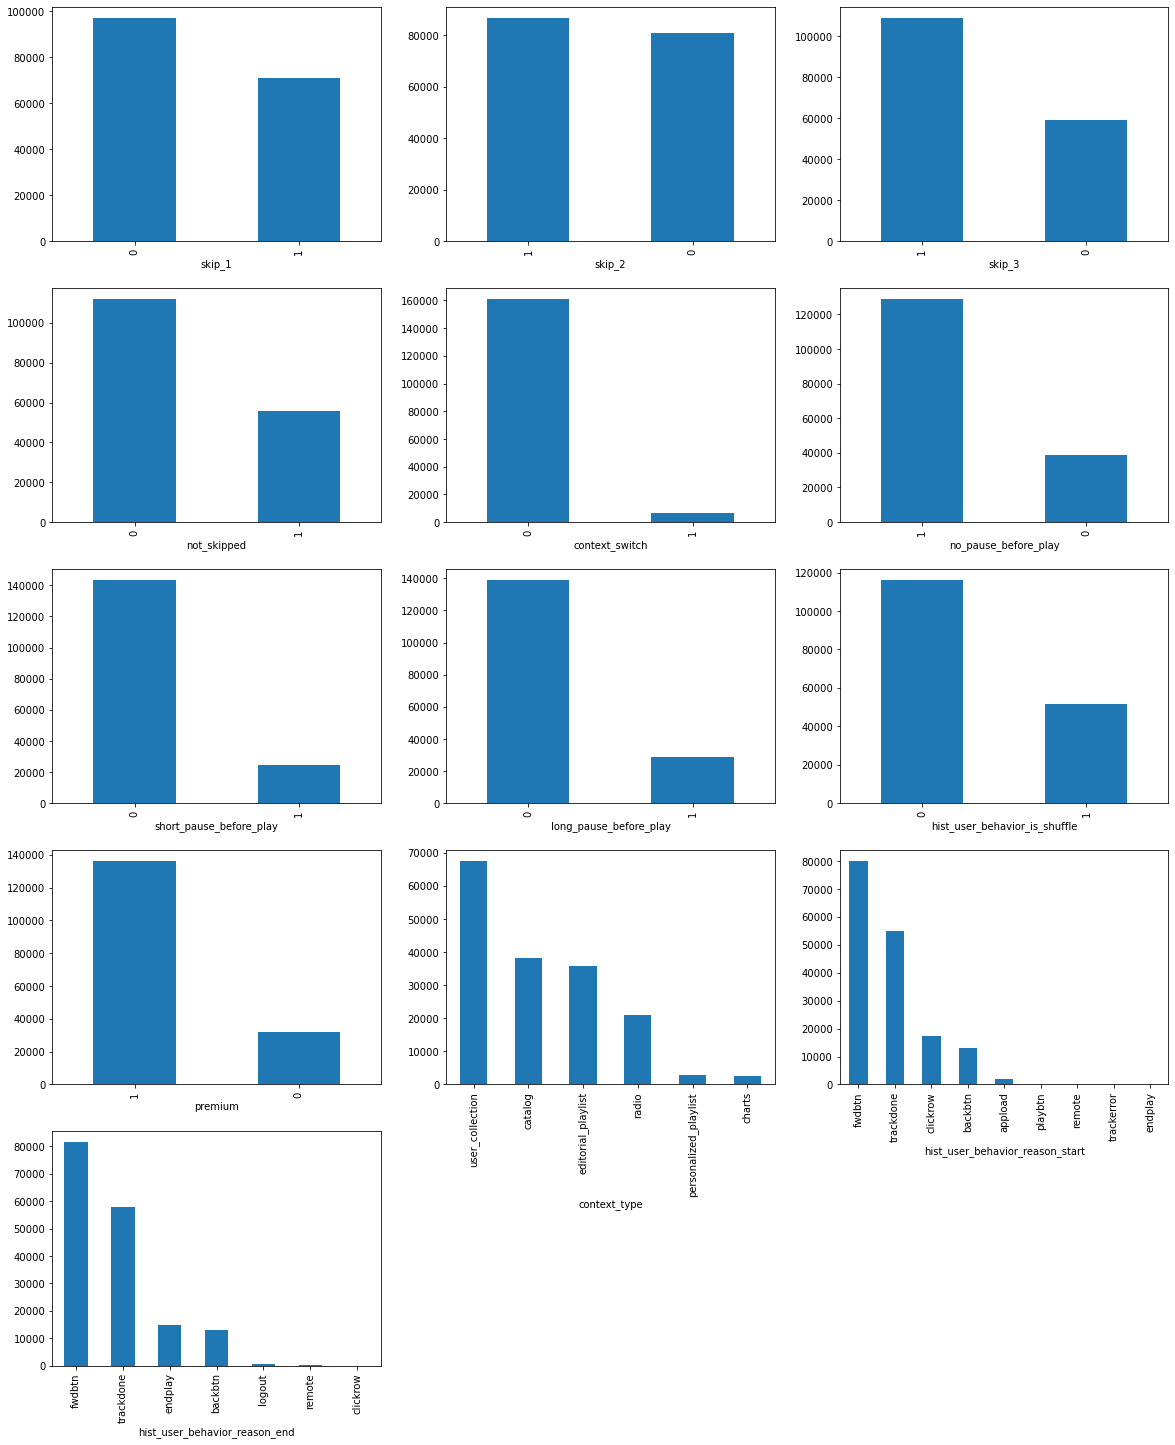

In [11]:
plt.figure(figsize=(20,25))
n = 1

for colname in col:
    plt.subplot(5,3,n)
    df[colname].value_counts().plot(kind='bar')
    plt.xlabel(colname)
    n +=1    

## one-hot encoding

In [12]:
df_without_session_track = df.drop(['session_id', 'track_id_clean'], axis=1)

In [13]:
df_without_session_track.shape

(167880, 19)

In [14]:
df_without_session_track = pd.get_dummies(df_without_session_track)

In [15]:
df_without_session_track.shape

(167880, 55)

## correlation
not_skipped_1 means not skip

In [16]:
correlation = df_without_session_track.corr()

In [18]:
correlation['not_skipped'].sort_values()

skip_3                                       -0.959225
skip_2                                       -0.731088
hist_user_behavior_reason_end_fwdbtn         -0.680506
skip_1                                       -0.602966
hist_user_behavior_reason_start_fwdbtn       -0.383116
hist_user_behavior_reason_end_endplay        -0.209849
hist_user_behavior_reason_end_backbtn        -0.203256
short_pause_before_play                      -0.126978
long_pause_before_play                       -0.092755
hist_user_behavior_reason_start_backbtn      -0.066307
session_length                               -0.059734
hist_user_behavior_n_seekfwd                 -0.052323
hist_user_behavior_reason_end_logout         -0.039445
hist_user_behavior_reason_start_appload      -0.036226
hist_user_behavior_is_shuffle                -0.030787
context_type_user_collection                 -0.029191
hist_user_behavior_reason_end_remote         -0.027876
context_type_radio                           -0.023680
date_2018-